In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_allnc_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_allnc_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_allnc_mm_cl= df_combined_allnc_mm.drop(columns=['label', 'filename'])
df_combined_allnc_z_cl= df_combined_allnc_z.drop(columns=['label', 'filename'])

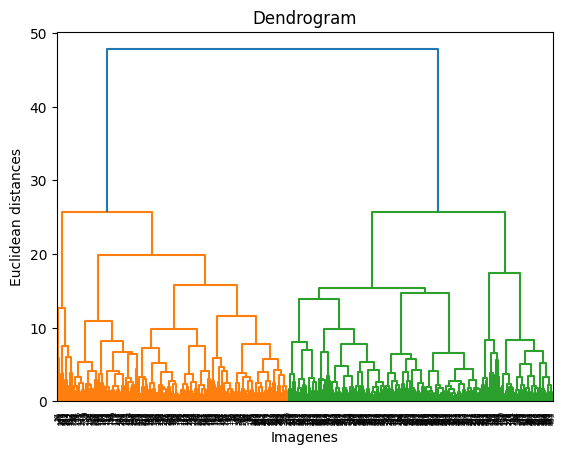

In [4]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_combined_allnc_z_cl, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

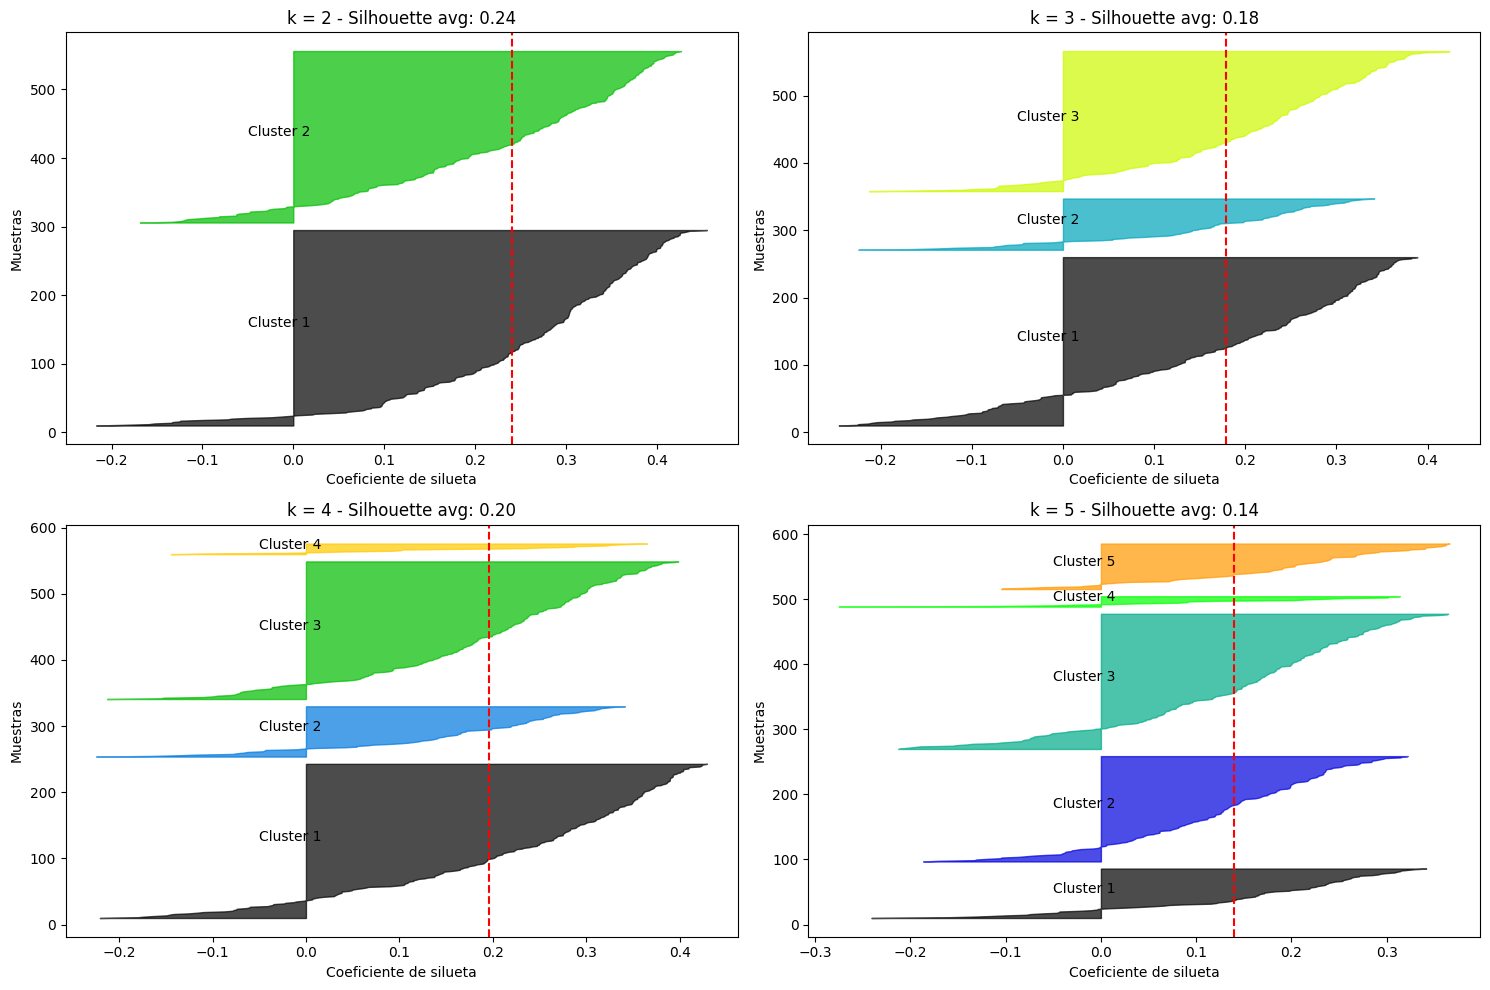

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer.fit_predict(df_combined_allnc_z_cl)
    silhouette_vals = silhouette_samples(df_combined_allnc_z_cl, labels)
    silhouette_avg = silhouette_score(df_combined_allnc_z_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals = silhouette_vals[labels == j]
        j_silhouette_vals.sort()
        size = len(j_silhouette_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [37]:
hc_z = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_z = hc_z.fit_predict(df_combined_allnc_z_cl)

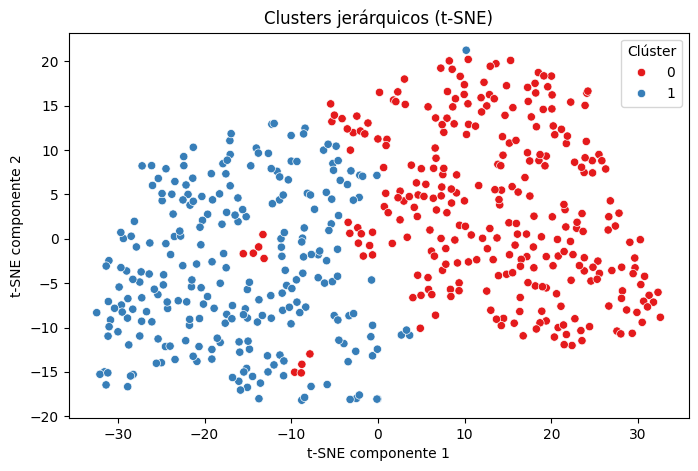

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [38]:
#Visualización alternativa con t-SNE (
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_combined_allnc_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=y_hc_z, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_z = pd.DataFrame({
    'filename': df_combined_allnc_z['filename'],
    'label': df_combined_allnc_z['label'],
    'cluster': y_hc_z
})

print(df_resultado_z)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


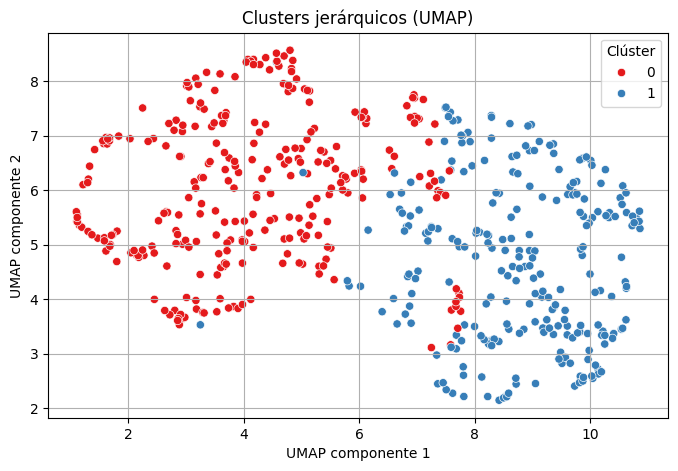

In [39]:
umap_z = umap.UMAP(n_neighbors=10,n_components=2, random_state=42)
X_umap_z = umap_z.fit_transform(df_combined_allnc_z_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=y_hc_z, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [40]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table = pd.crosstab(df_resultado_z['label'], df_resultado_z['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table)

cluster    0    1
label            
higher   225   43
smaller   61  208


In [10]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score = silhouette_score(df_combined_allnc_z_cl, y_hc_z)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.241


minmax

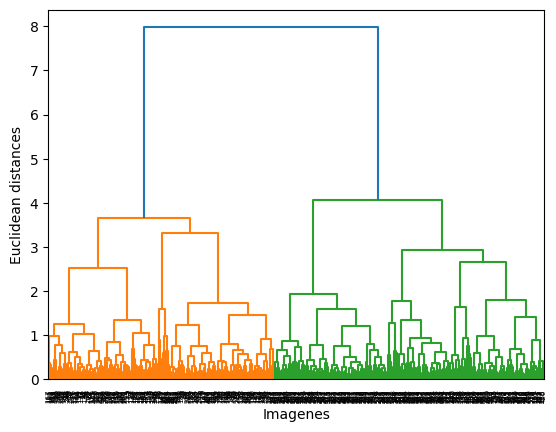

In [11]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_combined_allnc_mm_cl, method = 'ward')) 
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

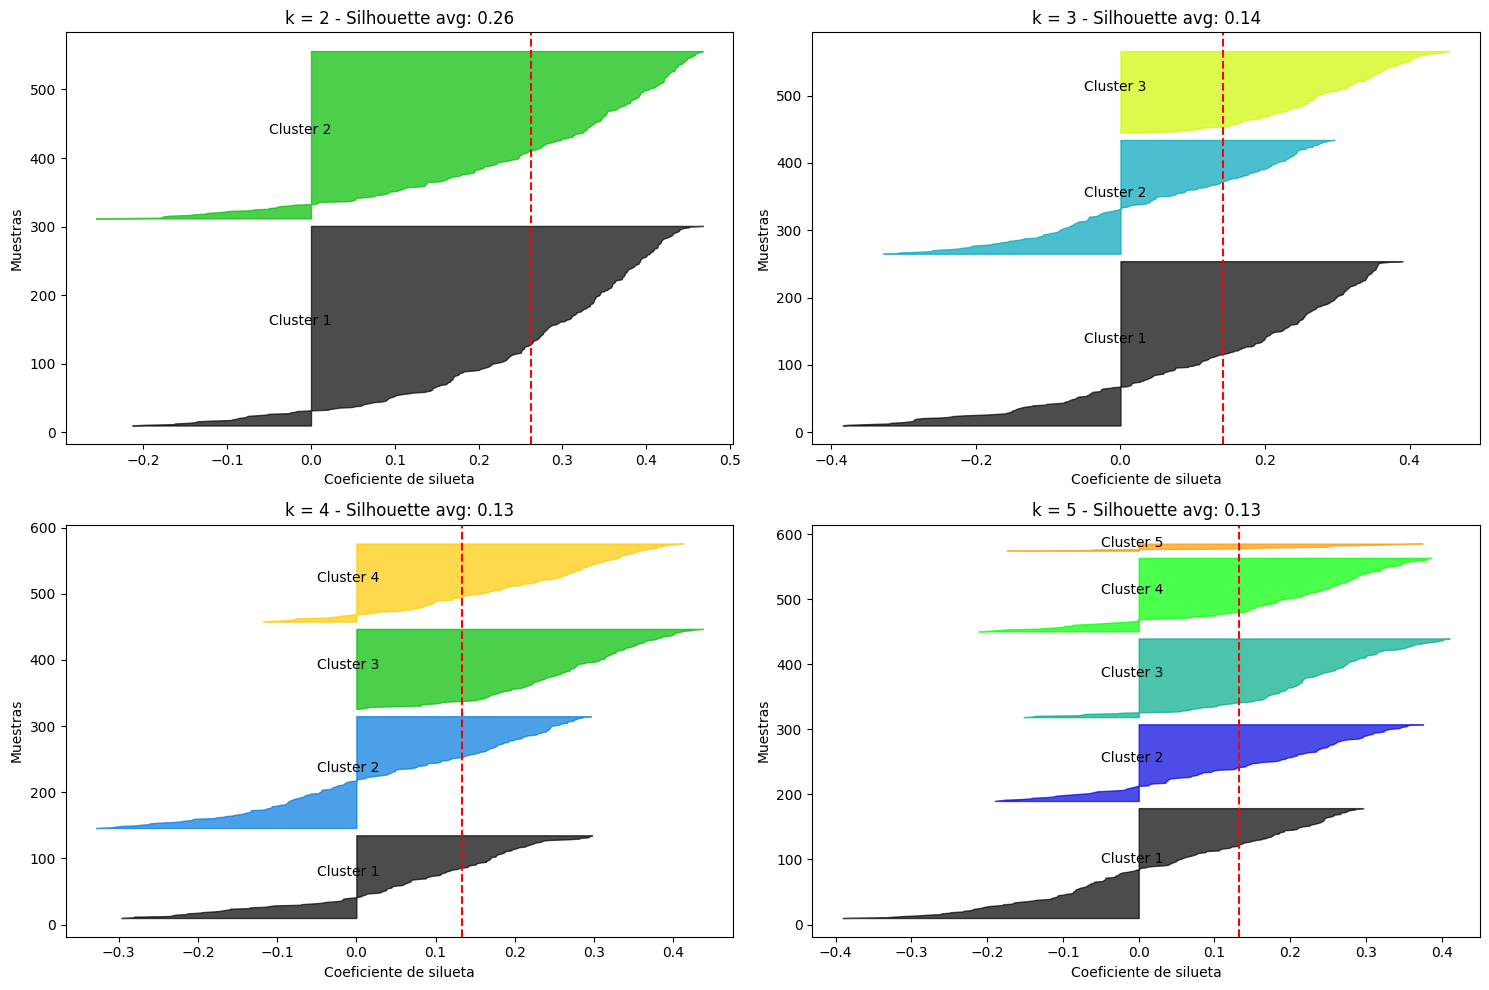

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer.fit_predict(df_combined_allnc_mm_cl)
    silhouette_vals = silhouette_samples(df_combined_allnc_mm_cl, labels)
    silhouette_avg = silhouette_score(df_combined_allnc_mm_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals = silhouette_vals[labels == j]
        j_silhouette_vals.sort()
        size = len(j_silhouette_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [41]:
hc_mm = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc_mm = hc_mm.fit_predict(df_combined_allnc_mm_cl)

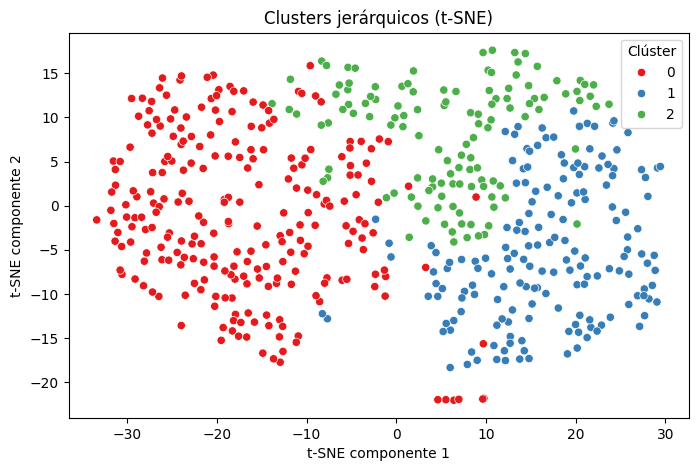

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        0
4    callo_102.png  smaller        0
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        2
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [42]:
#Visualización alternativa con t-SNE (
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_allnc_mm_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=y_hc_mm, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_mm = pd.DataFrame({
    'filename': df_combined_allnc_mm['filename'],
    'label': df_combined_allnc_mm['label'],
    'cluster': y_hc_mm
})

print(df_resultado_mm)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


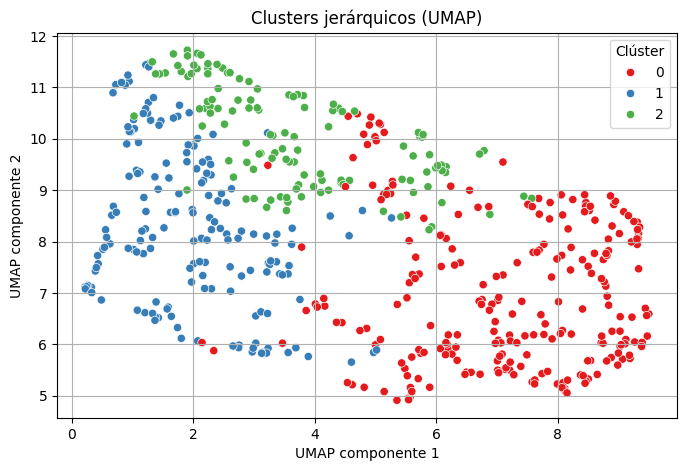

In [43]:
umap_mm = umap.UMAP(n_neighbors=9,n_components=2, random_state=42)
X_umap_mm = umap_mm.fit_transform(df_combined_allnc_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=y_hc_mm, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [44]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table = pd.crosstab(df_resultado_mm['label'], df_resultado_mm['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table)

cluster    0    1    2
label                 
higher    30  125  113
smaller  215   45    9


In [45]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score = silhouette_score(df_combined_allnc_mm_cl, y_hc_mm)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.142


Clustering sin tener en cuenta las características de color (sin reducción de la dimensionalidad):
CON Z-SCORE:
-con 3 clusters: El 77.3% de las imágenes smaller se encuentran en el cluster 0, 66.79% de las higher se encuentran en el cluster 2. En el cluster 1 hay una mezcla más o menos equilibrada de imágenes smaller y higher.
-con 2 clusters: el 83.95% de las imágenes etiquetadas como higher se encuentran en el cluster 0, mientras que en el cluster 1 se encuentra el 77.32% de las imágenes smaller.

CON MIN-MAX:
-Con dos clusters: 88.80% de las imágenes higher estánen el cluster 0 y el 79.92% de las imágenes smaller se encuentran en el cluster 1.
-Con tres clusters: con tres clusteres: en dos clusteres se encuentran repartidas las imágenes higher: en el cluster 1 el 46.64% y en el cluster 2 el 42.16%. En el cluster 1 están casi todas las imágenes smaller (79.92%)

Clustering teniendo en cuenta las características de color:
CON Z-SCORE: 
-Con tres clusters: Las imágenes higher se reparten entre los clusters 1 (55.22%) y el cluster 2 ( 38.43%). Las imágenes smaller se encuentran la mayor parte en el cluster 0 (75.46%)
-Con dos clusters: En el cluster 0 hay mezcla de imágenes higher y smaller de forma equilibrada pero en el cluster 1 hay más imágenes higher. 

con MIN-MAX:
-Con tres clusters: El cluster 1 contiene la mayoría de las imágenes higher (71.26%) y el cluster 3 la mayoría de las imágenes smaller (64.31%), en el cluster restante, el 0, hay tanto higher como smaller (31 y 61 respectivamente).
-Con dos clusters: La mayor parte de las imágenes se concentran en el cluster 1 (casi todas):

cluster    0   1
label           
higher   237  31
smaller  208  61



Clustering teniendo en cuenta las características de color pero con reducción de la dimensionalidad con umap:
CON ZSCORE
-3 CLUSTERES: Al igual que sin reducción de la dimensionalidad, las imágenes higher se reparten entre los clusteres 1 y 2. Las imágenes smaller están en su mayorái en el cluster 0.
-2 clusters: En el cluster 0 se encuentra el 96.26% de las imágenes higher y en el cluster 2 el 73.50% de las smaller.

CON MINMAX:
-CON 3 CLUSTERS: Las imágenes higher se reparten casi en su totalidad entre los clusters 0 y 1. Sin embargo, el cluster 0 tambien tiene una buena parte de las imágenes smaller, la otra parte se encuentra en el cluster 2.
col_0      0    1    2
label                 
higher   115  150    3
smaller  104   50  115

-con 2 clusters:
El cluster 0 está formado por mezcla de higher y smaller aunque predomina más smaller. En el cluster 0 hay más imágenes higher.
col_0      0    1
label            
higher   118  150
smaller  219   50


CONCLUSION
Cuando no  se usan características de color, el clustering tiende a separar mejor las imágenes higher y smaller. 
Al incluir las características de color, la separación se vuelve más difusa, especialmente con Min-Max, indicando que el color podría estar introduciendo ruido o no ser suficientemente discriminativo por sí solo.

En general, el escalado Z-Score produce una separación más clara entre clases (higher y smaller) en varios casos, especialmente en 3 clusters.

El Min-Max parece provocar una mayor mezcla de etiquetas en algunos clústeres, especialmente cuando se usan más características (como color) o reducción de dimensionalidad.
